In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

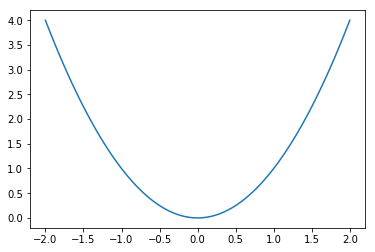

In [2]:
def harmonic_trap(xy, spring_constant=1.0, axis=None):
    '''Compute a harmonic potential for a vector or time series.
    
    Arguments:
        xy (array-like of float): a single n-dim vector or tn-dim time series
        spring_constant (float): the harmonic potential's prefactor
        axis (int): perform the summation along the given axis (for time series)
    '''
    return 0.5 * spring_constant * np.sum(xy**2, axis=axis)

x = np.linspace(-2, 2, 101)
xy = np.vstack((x, x)).T
plt.plot(x, harmonic_trap(xy, axis=1))

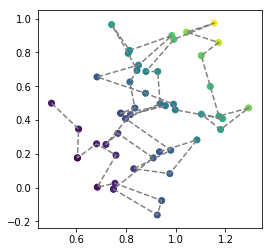

In [3]:
def metropolis_harmonic_trap(xy, energy_xy=None, width=0.4, spring_constant=1.0):
    '''Compute a Metropolis factor for a  harmonic potential.
    
    Arguments:
        xy (array-like of float): current position
        energy_xy (float): the potential energy of the current position
        width (float): width of the trial area
        spring_constant (float): the harmonic potential's prefactor
    '''
    if energy_xy is None:
        energy_xy = harmonic_trap(xy, spring_constant=spring_constant)
    xy_trial = xy + width * (np.random.rand(*xy.shape) - 0.5)
    energy_trial = harmonic_trap(xy_trial, spring_constant=spring_constant)
    if energy_trial <= energy_xy or np.random.rand() < np.exp(energy_xy - energy_trial):
        return xy_trial, energy_trial
    return xy, energy_xy

xy = [np.asarray([0.5, 0.5])]
energy_xy = [harmonic_trap(xy[-1])]
for i in range(50):
    xy_, energy_xy_ = metropolis_harmonic_trap(xy[-1], energy_xy=energy_xy[-1])
    xy.append(xy_)
    energy_xy.append(energy_xy_)
xy = np.asarray(xy)
energy_xy = np.asarray(energy_xy)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(*xy.T, '--', color='grey')
ax.scatter(*xy.T, c=energy_xy)

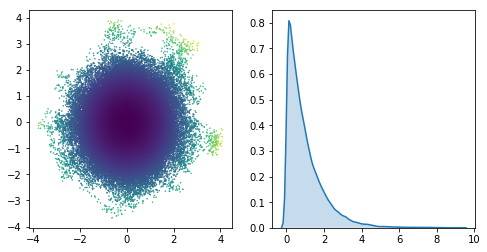

In [4]:
def mcmc(xy_init, n_steps, spring_constant=1.0):
    '''Compute a Metropolis factor for a  harmonic potential.
    
    Arguments:
        xy_init (array-like of float): starting position
        n_steps (int): number of Metropolis steps in the Markov chain
        spring_constant (float): the harmonic potential's prefactor
    '''
    xy = [np.asarray(xy_init)]
    energy_xy = [harmonic_trap(xy[-1], spring_constant=spring_constant)]
    for i in range(n_steps):
        xy_, energy_xy_ = metropolis_harmonic_trap(
            xy[-1], energy_xy=energy_xy[-1], spring_constant=spring_constant)
        xy.append(xy_)
        energy_xy.append(energy_xy_)
    return np.asarray(xy), np.asarray(energy_xy)

xy, energy_xy = mcmc([0.0, 0.0], 100000)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].scatter(*xy.T, c=energy_xy, marker='.', s=1)
sns.kdeplot(energy_xy, ax=axes[1], shade=True)

In [5]:
r = np.linalg.norm(xy, axis=1)
np.mean(r), np.std(r, ddof=1)

(1.2523833895892671, 0.65339007188592657)

In [6]:
np.mean(energy_xy), np.std(energy_xy, ddof=1)

(0.99768923570751478, 1.0069002300893173)

In [7]:
np.mean(xy[:, 0]), np.std(xy[:, 0], ddof=1)

(0.029512418508751751, 0.9890302714273892)

In [8]:
np.mean(xy[:, 1]), np.std(xy[:, 1], ddof=1)

(-0.027468847375554686, 1.0077658511392551)